In [4]:
using Modia
using Modia.Electric
using ModiaMath.plot

In [5]:
using Modia.Synchronous.positive
@model IdealDiode begin # Ideal diode
  @extends OnePort()
  @inherits v, i
  s = Float(start=0.0) # Auxiliary variable for actual position on the ideal diode characteristic
#=   s = 0: knee point
     s < 0: below knee point, diode conducting
     s > 0: above knee point, diode locking 
=#
@equations begin
  v = if positive(s); 0 else s end
  i = if positive(s); s else 0 end 
  end
end;

In [6]:
Rload=10;

In [7]:
@model Rectifier begin
  R=Resistor(R=Rload)
  r=Resistor(R=0.1)
  C=Capacitor(C=1,start=0)
  D=IdealDiode()
  V=SineVoltage(V=5,freqHz=1.5, offset=0, startTime=0)
@equations begin
  connect(V.p, D.p)
  connect(D.n, R.p)
  connect(R.n, r.p)
  connect(r.n, V.n)
  connect(C.n, R.n)
  connect(C.p, R.p)
  end
end;

In [8]:
result = simulate(Rectifier, 2);


Simulating model: Rectifier
Number of equations: 33
Number of variables: 35
Number of continuous states: 2


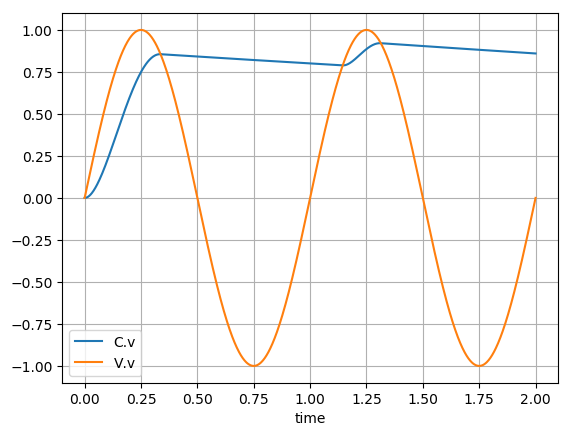

In [9]:
plot(result, ("C.v", "V.v"))

In [38]:
@model BPfilter begin
    R=Resistor(R=100.0)
    L=Inductor(L=25E-3)
    C=Capacitor(C=2.5E-6)
    V=ConstantVoltage(V=10.0)
@equations begin
    connect(V.p, R.p)
    connect(R.n, L.p)
    connect(L.n, C.p)
    connect(C.n, V.n)
    end
end;

In [39]:
result = simulate(BPfilter, 2);


Simulating model: BPfilter
Number of equations: 24
Number of variables: 26
Number of continuous states: 2


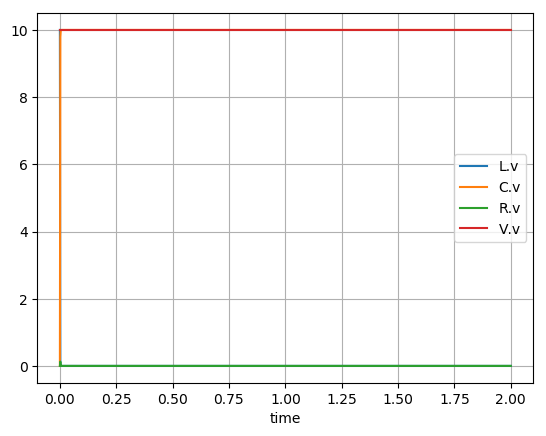

In [40]:
plot(result, ("L.v", "C.v", "R.v", "V.v"))

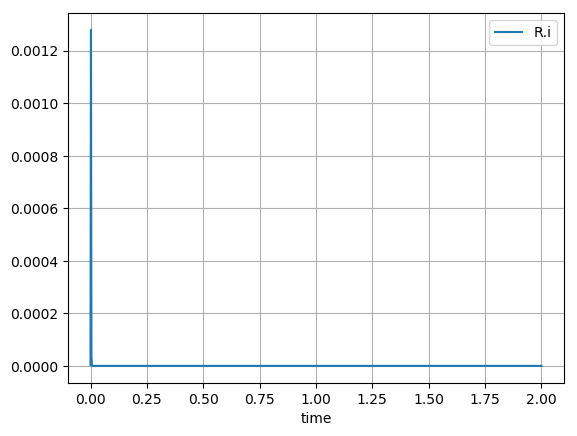

In [41]:
plot(result, ("R.i"))

In [46]:
(3.1415*(1.3/2)^2)*0.0254

0.03371300725000001

In [1]:
import ModiaMath
using Modia3D

material1 = Modia3D.Material(color="LightBlue", transparency=0.3);
material2 = Modia3D.Material(color="Red");

@assembly Pendulum(;Lx = 1.0, Ly=0.2*Lx, Lz=0.2*Lx) begin
   world       = Object3D(Modia3D.CoordinateSystem(0.5*Lx))
   beam_frame0 = Object3D(Modia3D.Solid(Modia3D.SolidBeam(Lx,Ly,Lz), "Aluminium", material1))
   beam_frame1 = Object3D(beam_frame0; r=[-Lx/2, 0.0, 0.0])
   cylinder    = Object3D(beam_frame1,Modia3D.Cylinder(Ly/2,1.2*Ly; material=material2))
   revolute    = Modia3D.Revolute(world, beam_frame1)
end;
simulationModel = Modia3D.SimulationModel(Pendulum(Lx=0.8),stopTime=5.0);

 
Welcome to Modia3D - Modeling and simulation of 3D systems
   Version : 0.2.0-beta.1



Environment variable "DLR_VISUALIZATION" not defined.
Include ENV["DLR_VISUALIZATION"] = <path-to-Visualization/Extras/SimVis> into your HOME/.juliarc.jl file.

No Renderer is used in Modia3D (so, animation is switched off).


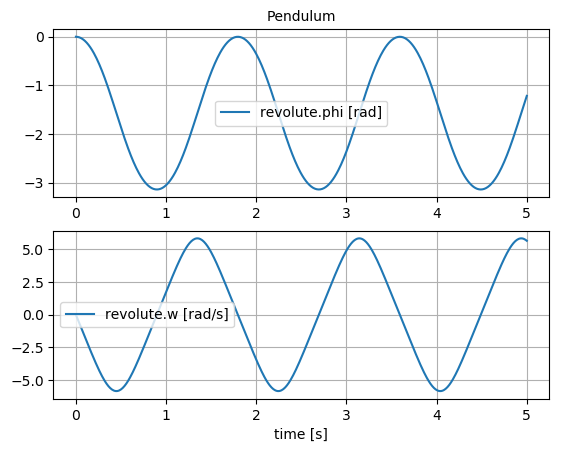

In [2]:
result = ModiaMath.simulate!(simulationModel);
ModiaMath.plot(result, ["revolute.phi", "revolute.w"]);